In [1]:
import sys
sys.path.append("..")

import shap
from src.trainer import (
    calculate_shap_values,
    create_train_test_splits,
    evaluate_model,
    load_and_preprocess_data,
    report_performance,
    train_model,
)


/home/hieultp/miniforge3/envs/phone-crawler/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X, y = load_and_preprocess_data("../data/cleaned_info.csv")

In [3]:
X_train, X_test, y_train, y_test = create_train_test_splits(X, y, test_size=0.2, random_state=42)

In [4]:
ridge_params = {
    "alpha": 1.0,
    "param_grid": {"alpha": [0.01, 0.1, 1.0, 10.0]},
}
knn_params = {
    "n_neighbors": 5,
    "param_grid": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]},
}
rf_params = {
    "n_estimators": 100,
    "param_grid": {
        "n_estimators": [50, 100, 150],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5],
    },
}

In [5]:
# Train different models
ridge_model = train_model(X_train, y_train, "ridge", ridge_params)
knn_model = train_model(X_train, y_train, "knn", knn_params)
rf_model = train_model(X_train, y_train, "random_forest", rf_params)

/home/hieultp/miniforge3/envs/phone-crawler/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.19214e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/hieultp/miniforge3/envs/phone-crawler/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.20252e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/hieultp/miniforge3/envs/phone-crawler/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.12064e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/hieultp/miniforge3/envs/phone-crawler/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.51865e-21): result may not be accurate.
  return linalg.solve

In [6]:
# Evaluate the models
ridge_metrics = evaluate_model(ridge_model, X_test, y_test)
knn_metrics = evaluate_model(knn_model, X_test, y_test)
rf_metrics = evaluate_model(rf_model, X_test, y_test)

In [7]:
print("Ridge result:")
report_performance(ridge_metrics)
print("KNN result:")
report_performance(knn_metrics)
print("Random Forest result:")
report_performance(rf_metrics)

Ridge result:
===== Model Performance =====
  MAE:  0.2356
  RMSE: 0.4834
  R2:   0.7922
  MAPE: 154.18%
  RAC @ 80USD: 0.82%

KNN result:
===== Model Performance =====
  MAE:  0.7468
  RMSE: 1.0180
  R2:   0.0784
  MAPE: 239.59%
  RAC @ 80USD: 0.43%

Random Forest result:
===== Model Performance =====
  MAE:  0.2492
  RMSE: 0.5007
  R2:   0.7771
  MAPE: 162.23%
  RAC @ 80USD: 0.84%



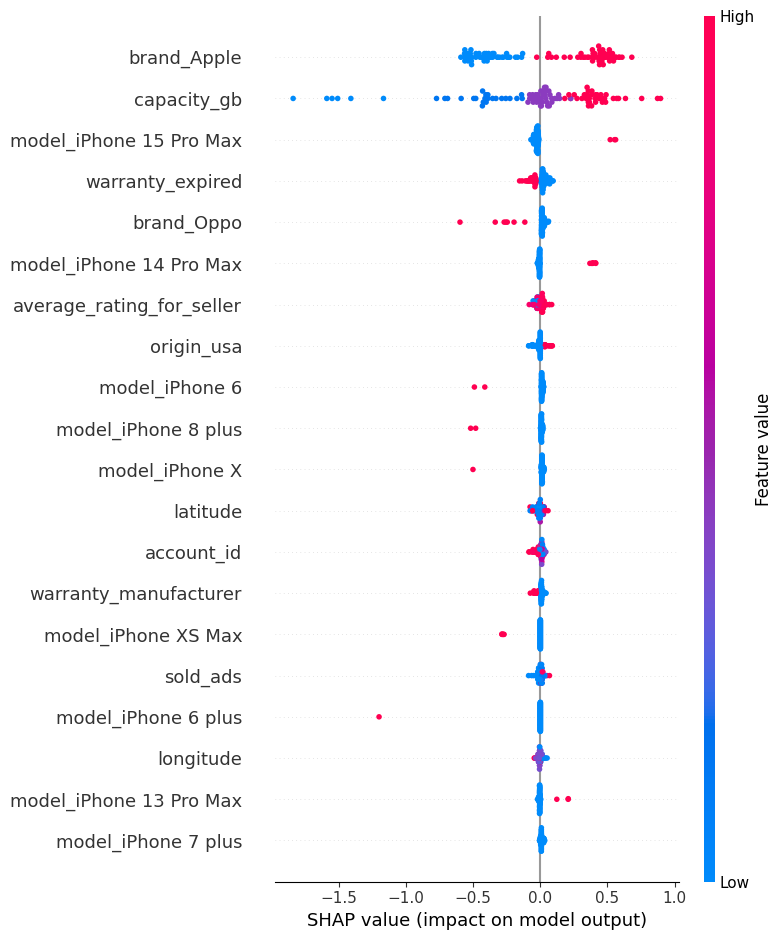

In [8]:
rf_shap_values, X_test_sample = calculate_shap_values(rf_model, X_test, X_train)
shap.summary_plot(rf_shap_values, X_test_sample)